# Preparation

## Import packages

In [3]:
import patch_seq_spl.helper_functions as src
import anndata
import pandas as pd

## Load AnnData object

In [2]:
adata = anndata.read_h5ad("proc/scquint/preprocessed_adata_three.h5ad")
adata = src.ExtendedAnnData(adata, ggtranscript=True)
adata = adata.add_predictors()

Removing cells with more than 6 missing ephys properties
Imputing the rest of the missing ephys values with mean


/Users/xunuo/projects/patch_seq_spl/patch_seq_spl/helper_functions.py:288: ImplicitModificationWarning: Setting element `.obsm['predictors']` of view, initializing view as actual.
  self.obsm["predictors"] = ephys_data


## Load glm_results

In [13]:
glm_results = src.get_glm_results("proc/scquint/three/simple")

In [15]:
glm_results.glm.rank_introns_by_n_sig_corr("all", True, True)

path,Lamp5,Pvalb,Serpinf1,Sncg,Sst,Vip,cpm,fi_fit_slope,hero_adapt,hero_avg_rate,...,rheo_trough_v,rheo_upstroke_downstroke_ratio,rheo_width,rheobase_i,sag,soma_depth,subclass,tau,v_baseline,vm_for_sag
event_name,,,,,,,,,,,,,,,,,,,,,
Scn1a_2_66181571_-,3.567678e-61,1.012637e-95,0.118166,0.000025,3.931779e-05,5.779556e-02,1.456342e-43,2.569962e-48,1.997033e-04,1.414990e-31,...,6.937881e-17,2.142605e-136,2.820015e-116,4.166972e-46,7.570563e-01,0.062412,6.712683e-143,1.449594e-28,0.000570,1.259727e-14
Gria3_X_40761095_+,1.818521e-16,4.086605e-26,0.921256,0.009563,6.918988e-76,2.498318e-04,1.348908e-06,6.018537e-06,2.068228e-10,1.049052e-10,...,9.539928e-01,7.336267e-01,4.981251e-02,1.284320e-25,3.254219e-13,0.819210,7.998693e-78,6.196590e-36,0.002361,1.432152e-02
Gria1_11_57208491_+,3.298908e-05,3.377668e-53,0.673881,0.000276,2.938713e-120,1.403672e-18,2.063565e-31,2.409019e-16,2.018891e-02,4.165100e-22,...,7.942146e-01,1.010489e-02,1.559201e-01,2.151673e-27,2.752023e-11,1.000000,9.291094e-125,2.713757e-56,0.020207,1.813080e-02
Itpr1_6_108345971_+,1.490522e-08,4.705215e-23,0.229220,0.550587,1.440202e-01,2.168711e-05,3.806948e-06,7.548940e-11,2.987536e-01,8.240945e-04,...,1.569706e-07,3.679397e-27,4.361904e-20,2.135166e-10,1.454558e-02,0.750729,2.127283e-29,1.842326e-05,0.153243,6.221646e-04
Gabrg2_11_41803419_-,2.856857e-01,2.561249e-49,0.780646,0.000032,7.502087e-01,1.466331e-19,1.721139e-01,2.268747e-15,1.321930e-04,4.023608e-17,...,5.752222e-14,3.747752e-49,1.126546e-31,1.530560e-40,8.172115e-01,0.839938,4.499456e-60,1.371104e-07,0.024551,1.261027e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gria1_11_57133574_+,5.508558e-02,8.973729e-01,0.734820,0.888176,3.533488e-01,3.522891e-01,2.575437e-01,9.474569e-01,7.293305e-01,9.890299e-01,...,9.952854e-01,1.346727e-01,1.322737e-01,9.370877e-01,1.713096e-01,0.318167,4.406537e-03,8.062200e-01,0.982794,5.580121e-01
Gria4_9_4472219_-,5.828368e-01,5.045292e-01,0.870710,0.487896,5.162102e-01,9.878755e-01,7.364073e-01,1.096948e-01,6.995688e-01,5.686712e-01,...,6.928948e-01,7.293029e-01,8.215401e-01,8.963875e-01,5.591790e-01,0.928082,9.571350e-02,7.797340e-01,0.995674,8.041763e-01
Grik1_16_87711293_-,7.531057e-01,4.459016e-01,1.000000,0.472859,9.357434e-01,5.135954e-01,4.829887e-02,9.640911e-01,9.909546e-01,8.632785e-01,...,3.099384e-01,6.251213e-01,5.599990e-01,9.251379e-01,8.100469e-01,0.976487,8.085821e-02,8.757547e-01,0.430843,9.906737e-01


## Load extracted ipfx traces

In [28]:
ipfx_results = pd.read_csv("proc/ipfx_results.csv")

In [29]:
ipfx_results

,sub-689440889_ses-693008936_icephys.nwb,sub-760006157_ses-761516004_icephys.nwb,sub-677855197_ses-679578671_icephys.nwb,sub-682365560_ses-685742420_icephys.nwb,sub-746220143_ses-750440866_icephys.nwb,sub-652361331_ses-653326944_icephys.nwb,sub-737379123_ses-741835481_icephys.nwb,sub-643830482_ses-645061403_icephys.nwb,sub-853715134_ses-855469227_icephys.nwb,sub-729731676_ses-735167358_icephys.nwb,...,sub-717036622_ses-718869899_icephys.nwb,sub-689595088_ses-692821588_icephys.nwb,sub-617297324_ses-623813080_icephys.nwb,sub-740369890_ses-743718179_icephys.nwb,sub-812386070_ses-816020039_icephys.nwb,sub-721974368_ses-724802308_icephys.nwb,sub-645665021_ses-647103434_icephys.nwb,sub-934128927_ses-940017889_icephys.nwb,sub-746220755_ses-750421116_icephys.nwb,sub-992385481_ses-993245664_icephys.nwb
0,-37.312500,-35.818752,-40.500000,-35.031250,-41.987500,-29.062502,-34.931250,-31.906250,-32.550000,-28.306252,...,-34.531250,-21.875002,-50.000000,-22.100002,-33.437500,-27.093752,-34.312500,-34.118748,-35.743750,-35.687504
1,-37.156250,-35.656250,-40.406254,-34.843750,-41.818750,-28.843752,-34.843750,-31.687502,-32.387500,-28.131252,...,-34.343754,-21.531250,-49.875004,-21.925001,-33.268750,-27.000000,-34.000000,-34.000000,-35.668755,-35.537500
2,-37.000000,-35.412502,-40.187500,-34.375000,-41.537502,-28.562502,-34.618750,-31.500000,-32.181248,-27.893750,...,-34.000000,-21.031252,-49.593754,-21.643751,-33.000000,-26.781252,-33.593750,-33.756250,-35.562500,-35.293755
3,-36.562504,-34.925003,-39.656250,-33.187500,-40.912502,-28.062502,-34.218750,-31.031250,-31.768751,-27.350000,...,-33.531254,-20.281252,-49.093754,-21.150000,-32.593754,-26.500002,-33.000000,-33.206250,-35.393753,-34.837498
4,-35.781254,-34.012505,-38.781250,-30.906250,-39.675000,-27.406252,-33.681250,-30.125002,-30.800000,-26.087500,...,-32.625000,-18.718752,-47.750004,-20.293750,-31.750002,-25.812502,-31.937502,-32.150000,-35.043755,-33.987500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-48.406250,-43.806250,-50.500000,-46.718754,-55.225000,-37.218754,-46.762505,-37.812500,-28.212502,-37.081253,...,-48.812500,-29.000002,-55.375004,-40.793755,-51.856255,-44.031250,-39.281254,-36.899998,-51.112503,-47.887505
996,-48.437504,-43.800000,-50.500000,-46.718754,-55.231255,-37.250000,-46.768750,-37.906250,-28.206250,-37.081253,...,-48.781254,-28.968752,-55.437500,-40.793755,-51.856255,-44.031250,-39.281254,-36.918750,-51.112503,-47.881250
997,-48.375004,-43.800000,-50.531254,-46.687504,-55.225000,-37.218754,-46.787500,-37.843754,-28.200000,-37.081253,...,-48.750004,-29.031250,-55.437500,-40.793755,-51.837500,-43.968754,-39.250000,-36.899998,-51.100002,-47.893753
998,-48.375004,-43.800000,-50.562500,-46.625004,-55.193752,-37.218754,-46.793750,-37.718750,-28.181252,-37.100000,...,-48.750004,-29.031250,-55.406254,-40.775000,-51.831253,-43.968754,-39.312500,-36.918750,-51.100002,-47.899998


# Individual events

## Grin1_2_25200488_-

In [3]:
intron_group = "Grin1_2_25200488_-"
ephys_prop = "rheo_upstroke_downstroke_ratio"

In [4]:
adata.plot_SJ_prop_sc_ttype(intron_group, ephys_prop)

null device 
          1 


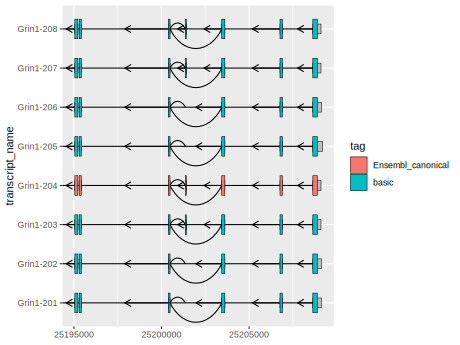

In [2]:
adata.plot_ggtranscript(intron_group)